# Example 15.4: Adiabatic Flame Temperature

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
$\require{mhchem}$
Determine the adiabatic flame temperature of propane ($\ce{C3H8}$) at $25^\circ\mathrm{C}$ and $1\ \mathrm{atm}$ when using 100% theoretical air.

## Solution

__[Video Explanation](https://iad.scorm.canvaslms.com/courses/sconeID/scone_prod.sha256_74886e51493266d610ebcc972e5b925133276d277252b9d3e0c56add2958487a/0/Ex15.4-Adiabatic%20Flame%20Temperature.mp4)__



### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
from kilojoule.tables import Cengel

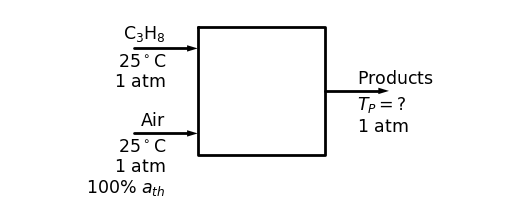

In [4]:
from kilojoule.schemdraw import *
with schemdraw.Drawing() as d:
    d += (chamb := thermo.HX(passes=3,coils=False))
    d += elm.Arrow().at(chamb.W1).left(1.5).reverse().label(r'$\mathrm{C_3H_8}$',halign='right').label(r'$25^\circ\mathrm{C}$'+'\n'+'$1\ \mathrm{atm}$',loc="bottom",halign='right')
    d += elm.Arrow().at(chamb.W3).left(1.5).reverse().label(r'$\mathrm{Air}$',halign='right').label(r'$25^\circ\mathrm{C}$'+'\n'+'$1\ \mathrm{atm}$'+'\n'+'$100\%\ a_{th}$',loc="bottom",halign='right')
    d += elm.Arrow().at(chamb.E).right(1.5).label(r'$\mathrm{Products}$',halign='left').label(r'$T_P=?$'+'\n'+'$1\  \mathrm{atm}$',loc="bottom",halign='left')

## Chemical Balance

\begin{equation}
	\ce{ C3H8 + a_{th}(O2 + $3.76$ N2) -> a CO2 + b H2O(g)  + c N2 }
\end{equation}

\begin{align}
	\ce{C}:& & % Carbon Balance
    	3&=a &
        &\Rightarrow&
        a&=3\\
	\ce{H}:& & % Hydrogen Balance
    	8&=2b &
        &\Rightarrow&
        b&=4\\
	\ce{O}:& & % Oxygen Balance
    	(2)a_{th}&=2a+b &
        &\Rightarrow& 
        a_{th}&=5\\
	\ce{N2}:& & % Nitrogen Balance
    	(3.76)a_{th}&=c &
        &\Rightarrow&
        d&=18.8\\
\end{align}

\begin{equation}
	\ce{C3H8(g) + 5(O2 + $3.76$N2) -> 3CO2 + 4 H2O(g) + $18.8$ N2}
\end{equation}

In [5]:
a = 3
b = 4
a_th = 5
c = 18.8

N_fuel = 1
N_air = a_th*4.76
N_O2_R = a_th
N_CO2 = a
N_H2O = b
N_N2 = c

### Property Tables

In [6]:
A1 = Cengel.Table("A1")
N2 = A18 = Cengel.Table("A18")
O2 = A19 = Cengel.Table("A19")
CO2 = A20 = Cengel.Table("A20")
CO = A21 = Cengel.Table("A21")
H2 = A22 = Cengel.Table("A22")
H2O = A23 = Cengel.Table("A23")
O = A24 = Cengel.Table("A24")
OH = A25 = Cengel.Table("A25")
A26 = Cengel.Table("A26")
A27 = Cengel.Table("A27")
set_latex({f'ho_f_molar_{i}':r'\overline{h}^{\,^\circ}_{f,\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2','CO_2'),
    ('H2O','H_2O'),
    ('N2','N_2'),
    ('O2','O_2'),
    ('C3H8','C_3H_8'),
    )})
set_latex({f'ho_molar_{i}':r'\overline{h}^{\,^\circ}_{\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2','CO_2'),
    ('H2O','H_2O'),
    ('N2','N_2'),
    ('O2','O_2'),
    ('C3H8','C_3H_8'),
    )})
set_latex({f'h_molar_{i}':r'\overline{h}_{\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('N2_R','N_2,R'),
    ('O2_R','O_2,R'),
    ('C3H8_R','C_3H_8,R'),
    )})
set_latex({f'h_molar_{i}':r'\overline{h}_{\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2_P','CO_2,P'),
    ('H2O_P','H_2O,P'),
    ('N2_P','N_2,P'),
    ('O2_P','O_2,P')
    )})

In [7]:
%%showcalc
"Temperatures"
T_0 = Quantity(25,'degC')
T_fuel = Quantity(25,'degC')
T_air = Quantity(25,'degC')
# T_products = Quantity(1500,'degC')
"Moles of fuel"
N_fuel = Quantity(1,'kmol')
"Enthalpies of formation at reference state"
ho_f_molar_CO2 = A26.ho_f_molar('CO2')
ho_f_molar_H2O = A26.ho_f_molar('H2O','g')
ho_f_molar_N2 = A26.ho_f_molar('N2')
ho_f_molar_O2 = A26.ho_f_molar('O2')
ho_f_molar_C3H8 = A26.ho_f_molar('C3H8')
"Enthalpies at reference state"
ho_molar_CO2 = CO2.h_molar(T_0)
ho_molar_H2O = H2O.h_molar(T_0)
ho_molar_N2 = N2.h_molar(T_0)
ho_molar_O2 = O2.h_molar(T_0)
"Reactant enthalpies"
h_molar_O2_R = O2.h_molar(T_air)
h_molar_N2_R = N2.h_molar(T_air)

Temperatures
\begin{align}
  T_{0} &=  25\ \mathrm{°C} 
\end{align}

\begin{align}
  T_{fuel} &=  25\ \mathrm{°C} 
\end{align}

\begin{align}
  T_{air} &=  25\ \mathrm{°C} 
\end{align}

Moles of fuel
\begin{align}
  N_{fuel} &=  1\ \mathrm{kmol} 
\end{align}

Enthalpies of formation at reference state
\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{CO_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( CO2 \right)  = -3.9352\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{H_2O}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( H2O, g \right)  = -2.4182\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{N_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( N2 \right)  = 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( O2 \right)  = 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{C_3H_8}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( C3H8 \right)  = -1.0385\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

Enthalpies at reference state
\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{CO_2}} &=  \mathrm{ \underset{ CO2 }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ CO2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 9369.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{H_2O}} &=  \mathrm{ \underset{ H2O }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ H2O }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 9908.6\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{N_2}} &=  \mathrm{ \underset{ N2 }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ N2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 8673.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{O_2}} &=  \mathrm{ \underset{ O2 }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ O2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 8686.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

Reactant enthalpies
\begin{align}
  \overline{h}_{\mathrm{O_2,R}} &=  \mathrm{ \underset{ O2 }{ h\_molar } }\left( T_{air} \right)  = \mathrm{ \underset{ O2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 8686.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}_{\mathrm{N_2,R}} &=  \mathrm{ \underset{ N2 }{ h\_molar } }\left( T_{air} \right)  = \mathrm{ \underset{ N2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 8673.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}



We need to determine a temperature for the products that will satisfy the first law.  With the assumptions of no work and no heat transfer, the enthalpies in the products and reactants should add up to 0.  We can set up a function to calculated the imbalance in the first law for a guess product temperature and repeated try different guessed temperatures until we find one that satisfies the first law.


In [8]:
from scipy.optimize import brentq

def F(T_guess):
    """Determine the imbalance in the first law using a guessed temperature for the products"""
    T_products = Quantity(T_guess,'K')
    "Product enthalpies"
    h_molar_CO2_P = CO2.h_molar(T_products)
    h_molar_H2O_P= H2O.h_molar(T_products)
    h_molar_N2_P = N2.h_molar(T_products)
    "1st Law"
    result = (N_CO2*(ho_f_molar_CO2 + h_molar_CO2_P - ho_molar_CO2) 
    + N_H2O*(ho_f_molar_H2O + h_molar_H2O_P - ho_molar_H2O) 
    + N_N2*(ho_f_molar_O2 + h_molar_N2_P - ho_molar_N2) 
    - N_O2_R*(ho_f_molar_O2 + h_molar_O2_R - ho_molar_O2) 
    - N_N2*(ho_f_molar_N2 + h_molar_N2_R - ho_molar_N2) 
    - 1*(ho_f_molar_C3H8))
    # Return the imbalance in the 1st law.  This will be zero when the guessed temperature is correct
    return result.to('kJ/kmol').magnitude

# Find a guessed value for T_products that results in zero error between the energy balance and transport calculations
# The following `brentq` function will repeatedly call the `F` function with geussed temperature values in the given
# range until it finds a value causes `F` to return 0
T_products = Quantity(brentq(F,500,2500),'K')

Summary(['T_products']);

<IPython.core.display.Latex object>

In [10]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex15.4 Adiabatic Flame Temperature.ipynb"